In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

---
# First part - Intro
---

#1. Прочитайте csv файл (використовуйте функцію read_csv)

In [47]:
data = pd.read_csv('bestsellers with categories.csv')
data

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


#2. Виведіть перші п'ять рядків (використовується функція head)

In [48]:
data.head(5)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


#3. Виведіть розміри датасету (використовуйте атрибут shape)

In [49]:
print(f" Кількість рядків: \033[1m{data.shape[0]}\033[0m \n Кількість стопчиків: \033[1m{data.shape[1]}\033[0m")

 Кількість рядків: 550 
 Кількість стопчиків: 7


#4. Відповідь: Про скільки книг зберігає дані датасет?

In [50]:
books_in_dataset = len(data['Name'].unique())
print(f'Датасет зберігає \033[1m{books_in_dataset}\033[0m унікальних книг')

Датасет зберігає 351 унікальних книг


#5. snake_style re-naming for columns 

In [51]:
data.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
data.columns

Index(['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre'], dtype='object')

---
# Part Two - Primary data research
---

#2.1 Перевірте, чи у всіх рядків вистачає даних:
виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)
Відповідь: Чи є в якихось змінних пропуски? (Так / ні)

In [60]:
missing_values = data.isna().sum()
print(missing_values, end='\n\n')

answer = 'Tak' if missing_values.sum() > 0 else 'Ні'

if answer == 'Tak':
    columns_with_missing = missing_values[missing_values>0].index.to_list()
    print(f'Пропуски є в наступних змінних: \033[1m{", ".join(columns_with_missing)}\033[0m')
print(f'\033[1mВідповідь:\033[0m Чи є в якихось змінних пропуски? (\033[1m{answer})\033[0m')

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

Відповідь: Чи є в якихось змінних пропуски? (Ні)


#2.2 Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)
Відповідь: Які є унікальні жанри?

In [63]:
# unique_genres = data['genre'].unique()
unique_genres = data.genre.unique()

print(f'Відповідь: Які є унікальні жанри? \033[1m{", ".join(unique_genres)}\033[0m')

Відповідь: Які є унікальні жанри? Non Fiction, Fiction


#2.3 Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')
Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median)
    Відповідь: Максимальна ціна?
    Відповідь: Мінімальна ціна?
    Відповідь: Середня ціна?
    Відповідь: Медіанна ціна?

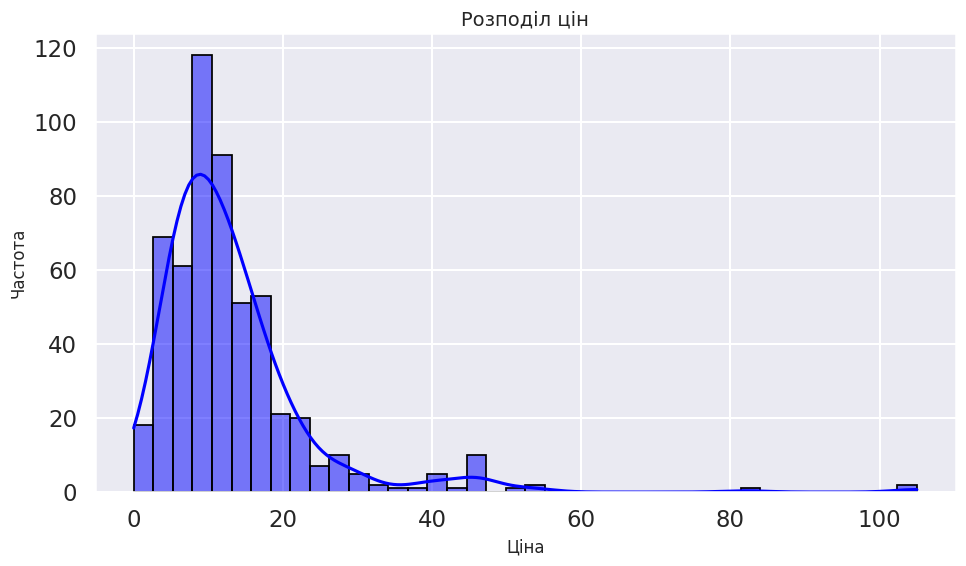

Відповідь: Максимальна ціна? 105
Відповідь: Мінімальна ціна? 0
Відповідь: Середня ціна? 13.1
Відповідь: Медіанна ціна? 11.0


In [95]:
sns.set_theme(style='darkgrid', context='talk', )

plt.figure(figsize=(10, 6))
# data['price'].plot(kind='hist', bins=40, color='blue', edgecolor='black', alpha=0.7)
sns.histplot(data['price'], kde=True, bins=40, edgecolor='black', color='blue')

plt.title('Розподіл цін', fontsize=14)
plt.xlabel('Ціна', fontsize=12)
plt.ylabel('Частота', fontsize=12)

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
plt.tight_layout()
plt.show()

max_price = data['price'].max()
min_price = data['price'].min()
mean_price = data['price'].mean()
median_price = data['price'].median()

print(f'Відповідь: Максимальна ціна? \033[1m{max_price}\033[0m')
print(f'Відповідь: Мінімальна ціна? \033[1m{min_price}\033[0m')
print(f'Відповідь: Середня ціна? \033[1m{mean_price}\033[0m')
print(f'Відповідь: Медіанна ціна? \033[1m{median_price}\033[0m')




---
# Part Three - Searching and Sorting Data
---

#3.1 Відповідь: Який рейтинг у датасеті найвищий? Відповідь: